In [21]:
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import itertools
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
# from pretty_confusion_matrix import pp_matrix

In [22]:
def plot_confusion_matrix(name, cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues, fold=0):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.0f'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Classe verdadeira')
    plt.xlabel('Classe prevista')

    plt.savefig(name)

    plt.close()

In [41]:
X = []
y = []

classes = ["beach","bus","cafe_restaurant","car","city_center","forest_path","grocery_store","home","library","metro_station","office","park","residential_area","train","tram"]

arq = open("./features_LBP_completo.txt", "r")
for linha in arq:
    aux = linha.split("|")
    lbp_local = []
    
    classe_local = []
    aux2 = aux[0].split(";")
    for i in aux2:
        classe_local.append(float(i))
    X.append(classe_local)
    y.append(aux[1].replace("\n", ""))
arq.close()

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  

In [43]:
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [1, 0.1, 0.01, 0.001, 'scale'],
              'kernel': ['rbf', 'sigmoid', 'poly']}
grid = GridSearchCV(SVC(probability=False), param_grid,
                    refit=True, verbose=5, cv=5)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.074 total time=   0.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.075 total time=   0.1s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.075 total time=   0.1s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.075 total time=   0.1s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.070 total time=   0.1s
[CV 1/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.074 total time=   0.1s
[CV 2/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.075 total time=   0.1s
[CV 3/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.075 total time=   0.1s
[CV 4/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.075 total time=   0.1s
[CV 5/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.070 total time=   0.1s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.074 total time=   0.1s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001, 'scale'],
                         'kernel': ['rbf', 'sigmoid', 'poly']},
             verbose=5)

In [26]:
# imprime o melhor parâmetro após o ajuste
print(grid.best_params_)

# imprime a aparência do nosso modelo após o ajuste de hiperparâmetros
print(grid.best_estimator_)

{'C': 100, 'gamma': 'scale', 'kernel': 'poly'}
SVC(C=100, kernel='poly')


In [44]:
y_preds = []
svm_preds = []
best_model_svm, best_acc_svm = None, 0.0

k_fold = 5
# Split dos folds
kfold = KFold(n_splits=k_fold, shuffle=True)

# For para treinamento entre os folds
fold_no = 1
for train, test in kfold.split(X, y):
    print('------------------------------------------------------------------------')
    print(f'Treinamento para o fold {fold_no} ...')

    # Vetores para teste e treinamento
    x_train_svm = []
    y_train_svm = []

    x_test_svm = []
    y_test_svm = []

    # Fazendo o split dos dados para treinamento
    for i in train:
        x_train_svm.append(X[i])
        y_train_svm.append(y[i])
    
    # Fazendo o split dos dados para teste
    for i in test:
        x_test_svm.append(X[i])
        y_test_svm.append(y[i])


    y_pred = y_test_svm[:]
    for res in y_pred:
        y_preds.append(res)

    # SVM
    svm_model = SVC(C=100, kernel='poly', gamma='scale', probability=True)
    svm_model.fit(x_train_svm, y_train_svm)
    svm_predictions = svm_model.predict_proba(x_test_svm)

    svm_predictions = svm_model.predict(x_test_svm)
    acc_svm = accuracy_score(y_test_svm, svm_predictions)

    for i in svm_predictions:
        svm_preds.append(i)

    print(f'{acc_svm} para o fold {fold_no}')

    if acc_svm > best_acc_svm:
        best_acc_svm = acc_svm
        best_model_svm = svm_model

    fold_no += 1

------------------------------------------------------------------------
Treinamento para o fold 1 ...
0.5299145299145299 para o fold 1
------------------------------------------------------------------------
Treinamento para o fold 2 ...
0.5042735042735043 para o fold 2
------------------------------------------------------------------------
Treinamento para o fold 3 ...
0.5085470085470085 para o fold 3
------------------------------------------------------------------------
Treinamento para o fold 4 ...
0.6025641025641025 para o fold 4
------------------------------------------------------------------------
Treinamento para o fold 5 ...
0.48717948717948717 para o fold 5


0.5264957264957265


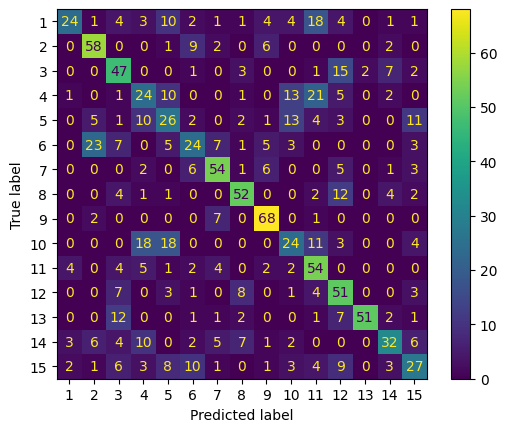

                  precision    recall  f1-score   support

           beach       0.71      0.31      0.43        78
             bus       0.60      0.74      0.67        78
 cafe_restaurant       0.67      0.67      0.67        78
             car       0.72      0.87      0.79        78
     city_center       0.37      0.31      0.34        78
     forest_path       0.45      0.69      0.54        78
   grocery_store       0.45      0.65      0.53        78
            home       0.96      0.65      0.78        78
         library       0.59      0.41      0.48        78
   metro_station       0.43      0.35      0.38        78
          office       0.48      0.60      0.54        78
            park       0.32      0.31      0.31        78
residential_area       0.31      0.33      0.32        78
           train       0.40      0.31      0.35        78
            tram       0.66      0.69      0.68        78

        accuracy                           0.53      1170
       macro

In [45]:
svm_preds_classes = []
y_preds_classes = []

for i in range(len(svm_preds)):
    svm_preds_classes.append(classes[int(svm_preds[i])])
    y_preds_classes.append(classes[int(y_preds[i])])

matriz_confusao = confusion_matrix(y_preds, svm_preds)
relatorio_classificacao = classification_report(y_preds_classes, svm_preds_classes)

acc = accuracy_score(y_preds, svm_preds)
print(acc)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=matriz_confusao, display_labels=[i for i in range(1, 16)])

cm_display.plot()

plt.show()

print(relatorio_classificacao)

In [46]:
param_grid = {'n_neighbors': [1, 3, 5, 7, 9],
              'weights': ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan']}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, refit=True, verbose=3, cv=5)

grid.fit(X_train, y_train)

print("Melhores parâmetros:", grid.best_params_)
print("Melhor Acurácia:", grid.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.543 total time=   0.1s
[CV 2/5] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.556 total time=   0.1s
[CV 3/5] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.513 total time=   0.1s
[CV 4/5] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.519 total time=   0.0s
[CV 5/5] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.556 total time=   0.0s
[CV 1/5] END metric=euclidean, n_neighbors=1, weights=distance;, score=0.543 total time=   0.0s
[CV 2/5] END metric=euclidean, n_neighbors=1, weights=distance;, score=0.556 total time=   0.0s
[CV 3/5] END metric=euclidean, n_neighbors=1, weights=distance;, score=0.513 total time=   0.0s
[CV 4/5] END metric=euclidean, n_neighbors=1, weights=distance;, score=0.519 total time=   0.0s
[CV 5/5] END metric=euclidean, n_neighbors=1, weights=distance;, score=0.556 to

In [48]:
y_preds = []
knn_preds = []
best_model_knn, best_acc_knn = None, 0.0

k_fold = 5
# Split dos folds
kfold = KFold(n_splits=k_fold, shuffle=True)

# For para treinamento entre os folds
fold_no = 1
for train, test in kfold.split(X, y):
    print('------------------------------------------------------------------------')
    print(f'Treinamento para o fold {fold_no} ...')

    # Vetores para teste e treinamento
    x_train_knn = []
    y_train_knn = []

    x_test_knn = []
    y_test_knn = []

    # Fazendo o split dos dados para treinamento
    for i in train:
        x_train_knn.append(X[i])
        y_train_knn.append(y[i])
    
    # Fazendo o split dos dados para teste
    for i in test:
        x_test_knn.append(X[i])
        y_test_knn.append(y[i])

    y_pred = y_test_knn[:]
    for res in y_pred:
        y_preds.append(res)

    # kNN com os melhores parâmetros encontrados
    knn_model = KNeighborsClassifier(n_neighbors=5, weights='distance', metric='manhattan')
    knn_model.fit(x_train_knn, y_train_knn)
    knn_predictions = knn_model.predict(x_test_knn)

    acc_knn = accuracy_score(y_test_knn, knn_predictions)

    for i in knn_predictions:
        knn_preds.append(i)

    print(f'{acc_knn} para o fold {fold_no}')

    if acc_knn > best_acc_knn:
        best_acc_knn = acc_knn
        best_model_knn = knn_model

    fold_no += 1

------------------------------------------------------------------------
Treinamento para o fold 1 ...
0.6324786324786325 para o fold 1
------------------------------------------------------------------------
Treinamento para o fold 2 ...
0.6623931623931624 para o fold 2
------------------------------------------------------------------------
Treinamento para o fold 3 ...
0.6923076923076923 para o fold 3
------------------------------------------------------------------------
Treinamento para o fold 4 ...
0.6623931623931624 para o fold 4
------------------------------------------------------------------------
Treinamento para o fold 5 ...
0.6153846153846154 para o fold 5


In [49]:
knn_preds_classes = []
y_preds_classes = []

for i in range(len(knn_preds)):
    knn_preds_classes.append(classes[int(knn_preds[i])])
    y_preds_classes.append(classes[int(y_preds[i])])

matriz_confusao = confusion_matrix(y_preds, knn_preds)
relatorio_classificacao = classification_report(y_preds_classes, knn_preds_classes)

acc = accuracy_score(y_preds, knn_preds)
print(acc)

0.652991452991453


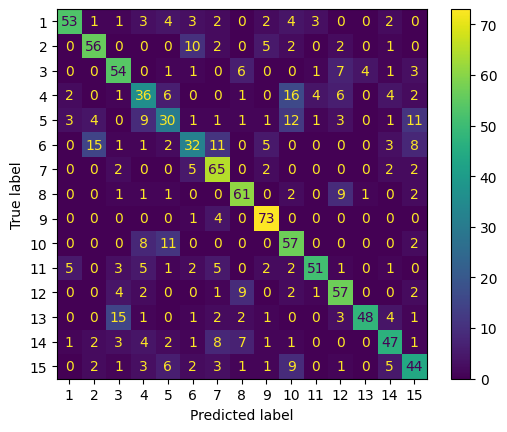

                  precision    recall  f1-score   support

           beach       0.83      0.68      0.75        78
             bus       0.70      0.72      0.71        78
 cafe_restaurant       0.69      0.78      0.73        78
             car       0.78      0.94      0.85        78
     city_center       0.53      0.73      0.62        78
     forest_path       0.84      0.65      0.73        78
   grocery_store       0.64      0.73      0.68        78
            home       0.91      0.62      0.73        78
         library       0.66      0.60      0.63        78
   metro_station       0.56      0.56      0.56        78
          office       0.63      0.69      0.66        78
            park       0.49      0.46      0.48        78
residential_area       0.47      0.38      0.42        78
           train       0.54      0.41      0.47        78
            tram       0.62      0.83      0.71        78

        accuracy                           0.65      1170
       macro

In [50]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=matriz_confusao, display_labels=[i for i in range(1, 16)])

cm_display.plot()

plt.show()

print(relatorio_classificacao)